# Práctica Guiada de Laboratorio 5: Implementación del juego inteligente *Michi en Python* - Parte 2

## Curso "Inteligencia Artificial" Semestre 2022-1 - Grupo 1 - EAPIS

### Prof. Rolando A. Maguiña Pérez

## Introducción

En la primera parte de este documento, se presentó la construcción en Python de la interfaz del juego ampliamente conocido y popular, llamado *Michi*; dicha implementación se hizo a nivel de consola únicamente. 

En esta segunda parte, se presenta la construcción del programa que permitirá no solamente efectuar las jugadas del humano, sino que determinará las jugadas de la máquina mediante una estrategia adecuada. Asimismo, indicará la estrategia usada para efectuar dichos movimientos. 

## Objetivos dela PGL 5

- Entender a cabalidad la implementación de un juego inteligente, en este caso la del juego llamado *Michi*.
- Servir de base y/o inspiración para la implementación del juego denominado *Los Tres Mosqueteros* o del *Juego del Chomp*, a desarrollarse como parte del Trabajo Computacional 1 del curso.

## Plataforma de juego

La plataforma básica de un juego inteligente está formada por los sgtes componentes:
- Interfaz de juego (presentada en documento "Implementación del juego inteligente *Michi* en Python - Parte 1")
- Inicio de una partida (estado inicial) 
- Realización de jugadas (cjto de operadores)
- Verificación de la validez de un movimiento 
- Verificación de condición de parada (test de parada)
- Estrategia de juego de la máquina
Las jugadas de la máquina se pueden efectuar aplicando una de las estrategias mostradas a continuación:
    - Estrategia Aleatoria
    - Estrategia Primero el Mejor
    - Estrategia MiniMax
    - Estrategia MiniMax con poda alfa-beta

### Análisis de la configuración del juego

Hay 8 maneras de completar una línea (3  horizontalmente, 3 verticalmente, y 2 en la diagonal); a c/u de esas combinaciones la llamaremos *tripleta*.  Todas esa combinaciones serán almacenadas en la variable *TRIPLETAS*. 

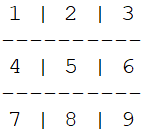

In [1]:
from IPython.display import Image

i = Image(filename="D:\\Cursos\\IA\\Python\\2021-1\\tablero_con_nros1.png")
i

#### Variable *Tripletas*

In [2]:
tripletas = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9],
    [1, 5, 9],
    [3, 5, 7],
]

In [3]:
print(tripletas)

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 4, 7], [2, 5, 8], [3, 6, 9], [1, 5, 9], [3, 5, 7]]


Definimos ahora la función `suma_tripleta()` cuyo propósito es devolver la suma de los valores de las posiciones consideradas en una tripleta. También definimos `calcula_sumas()` la cual aplica la función anterior a las tripletas contenidas en la variable del mismo nombre.

#### Función *suma_tripleta*

In [4]:
def suma_tripleta(tablero, tripleta):
    a, b, c = tripleta[0] - 1, tripleta[1] - 1, tripleta[2] - 1
    return tablero[a] + tablero[b] + tablero[c]

Llamamos a la función con un tablero cualquiera para comprobar su funcionamiento:

In [5]:
suma_tripleta([0, 0, 1, 0, 1, 0, 0, 0, 10], [1, 2, 3])

1

En el ejm, suma los valores correspondientes a las posiciones 1, 2 y 3 contenidas en la tripleta; devuelve valor 1. 

#### Función *calcula_sumas()*

In [6]:
def calcula_sumas(tablero):
    sumas = []
    for x in tripletas:
        z = suma_tripleta(tablero, x)
        sumas.append(z)
    return sumas

Verificando el comportamiento de `calcula_sumas()` al llamarla con argumento *tablero* para varios casos:

In [7]:
calcula_sumas([0, 10, 10, 0, 1, 0, 0, 0, 10])

[20, 1, 10, 0, 11, 20, 11, 11]

In [8]:
calcula_sumas([0, 1, 0, 0, 1, 0, 0, 0, 10])

[1, 1, 10, 0, 2, 10, 11, 1]

In [9]:
calcula_sumas([0, 10, 0, 0, 1, 0, 1, 1, 1])

[10, 1, 3, 1, 12, 1, 2, 2]

### Condición de parada

#### Función *ganador_p()*

Definimos el predicado `ganador_p()` para verificar si uno de los jugadores completó una línea.

In [10]:
def ganador_p(tablero):
    sumas = calcula_sumas(tablero)
    gana_op = False
    gana_pc = False

    if 3 in sumas:
        gana_op = True

    if 30 in sumas:
        gana_pc = True

    if gana_op == True and gana_pc == False:
        ganador = gana_op
    elif gana_op == False and gana_pc == True:
        ganador = gana_pc
    else:
        ganador = False
    return ganador

En esta función a la variable *sumas* se le asigna el resultado del llamado de `calcula_sumas()`. En su cuerpo, verifica si ha ganado el jugador máquina o el jugador oponente. 

Verificando el comportamiento de la función `ganador_p()` al llamarla con argumento *tablero* (para varios casos, como es mostrado en las celdas sgtes):

In [11]:
ganador_p([0, 10, 10, 0, 1, 0, 10, 0, 0])

False

In [12]:
ganador_p([0, 10, 1, 0, 1, 0, 10, 0, 0])

False

In [13]:
ganador_p([10, 10, 10, 0, 1, 0, 10, 0, 0])

True

In [14]:
ganador_p([0, 10, 10, 0, 1, 0, 1, 1, 1])

True

###  Inicio del juego   

#### Función *inicio()*

Definimos la función `inicio()` que pregunta al usuario si desea comenzar el juego, y llama luego a `movimiento_pc()` o a `movimiento_oponente()`, según sea la decisión tomada. 

In [ ]:
def inicio():

    print(
        """\n
          ------ JUEGO DEL MICHI -----
          Le gustaria comenzar el juego?
          [1] Si
          [2] NO
          [3] Salir
    """
    )
    opcion = int(input("Seleccione la opcion: \n"))

    if opcion == 1:
        print("oponente inicia juego")
        movimiento_oponente(crear_tablero())
    elif opcion == 2:
        # print ('maquina inicia juego')
        movimiento_pc(crear_tablero())
    elif opcion == 3:
        print("\n")
        print("Saliendo ...")

### Jugadas

#### Jugadas del jugador humano

Definimos ahora la función `movimiento_oponente()` la cual toma como parámetro el tablero actual y permite efectuar los movimientos del jugador humano. Además, verifica con `validar_movimiento()` si el movimiento es válido, actualiza el tablero y llama a la función `movimiento_pc()`, excepto que haya un ganador o un empate. También se comprueba mediante  `tablero_lleno_p()` si el tablero está lleno.

In [15]:
def validar_movimiento(tablero):
    global cent
    print(tablero)
    pos = int(input("Ingrese tu movimiento: "))
    if tablero[pos - 1] == 0:
        pos = pos
        cent = pos
    else:
        # pos=int(input("Ingrese un movimiento valido: "))
        print("casilla ocupada")
        validar_movimiento(tablero)

    return pos

In [16]:
def tablero_lleno_p(tablero):  # Retorna True si no hay celdas vacias

    for i in tablero:
        if tablero[i] == 0:
            print(tablero[i])
            return False
        else:
            return True

In [17]:
def movimiento_oponente(tablero):

    posi = validar_movimiento(tablero)

    nuevo_tablero = efectuar_movimiento(oponente, cent, tablero)

    print("Mi movimiento: ", posi)
    imprimir_tablero(nuevo_tablero)

    if ganador_p(nuevo_tablero) == True:
        print("    Gana Oponente")
        inicio()
    elif tablero_lleno_p == True:
        print("    Empate")
    else:
        movimiento_pc(nuevo_tablero)

#### Jugadas de la computadora

Como sabemos, las jugadas de la máquina (computadora) se obtienen aplicando alguna estrategia de búsqueda; se disponen de las sgtes estrategias:
- Estrategia Aleatoria (nivel básico)
    - No usa función de evaluación.
- Estrategia Primero el Mejor (nivel intermedio)
    - Usa función de evaluación.
- MiniMax (nivel experto)
    - Usa función de evaluación
    - Aplica algoritmo
        - Sin poda alfa-beta  
        - Con poda alfa-beta

Definimos ahora `movimiento_pc()` para efectuar los movimientos del jugador computadora. Esta función llama a `escoger_estrategia_pc()` para seleccionar la estrategia a usar en las jugadas de la máquina; llama también `movimiento_oponente()`, excepto que haya un ganador o un empate.

In [18]:
def movimiento_pc(tablero):
    print("ahora le toca jugar a la PC")
    mejor_movimiento = escoger_estrategia_pc(tablero)
    pos = mejor_movimiento[0]
    estrategia = mejor_movimiento[1]

    nuevo_tablero = efectuar_movimiento(pc, pos, tablero)

    print("movimientos: ", pos)
    print("Estrategia: ", estrategia)

    imprimir_tablero(nuevo_tablero)

    if ganador_p(nuevo_tablero) == True:
        print("    Gana PC")
        inicio()
    elif tablero_lleno_p == True:
        print("    Empate")
    else:
        movimiento_oponente(nuevo_tablero)

    # return tablero

##### Implementando la estrategia aleatoria

Mediante la función `escoger_estrategia_pc()` se determinará la estrategia de juego para las jugadas de la máquina. Inicialmente se implementará la estrategia aleatoria para la máquina.

In [19]:
def escoger_estrategia_pc(tablero):
    return estrategia_aleatoria(tablero)

Usaremos como estrategia de búsqueda para la máquina la **estrategia aleatoria**: escoge al azar un movimiento válido mediante la función `estrategia_aleatoria`, la cual, a su vez, usa `seleccion_aleatoria_casillero_vacio()` para tomar un número aleatorio.

In [20]:
def estrategia_aleatoria(tablero):

    valor = seleccion_aleatoria_casillero_vacio(tablero).pop()

    tupla = valor, "Movimiento Aleatorio"

    return tupla

In [21]:
import random


def seleccion_aleatoria_casillero_vacio(tablero):
    pos = random.randint(0, 8)
    # print(pos)

    if tablero[pos - 1] != 0:
        return seleccion_aleatoria_casillero_vacio(tablero)
    else:
        pos = pos
        return pos

    return pos

Verificando el comportamiento de la función al llamarla con un tablero ejm como argumento: 

In [22]:
seleccion_aleatoria_casillero_vacio([10, 10, 1, 0, 10, 0, 10, 10, 1])

6

### CÓDIGO COMPLETO

A continuación, se presenta el código completo del juego inteligente llamado  Michi en la computadora. El programa no solamente permite jugar al jugador humano sino que implementa la estrategia de búsqueda llamada estrategia aleatoria de modo que la máquina pueda realizar sus jugadas. 

Dado que el nivel de inteligencia implementado para la máquina es bajo,  se asume que la computadora no jugará bien y la mayoría de las veces perderá las partidas.

In [ ]:
import random

# variables para PC y Oponente
pc = 10
oponente = 1

# tablero=[0,1,1,0,10,0,0,10,1]
# crea tablero nuevo
def crear_tablero():
    tablero = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    # print(tablero)
    return tablero


# Convierte valores de 1 -> O e 10 -> X
def convertir_a_letras(v):
    if v == 1:
        return "O"
    elif v == 10:
        return "X"
    elif v == 0:
        return " "


def imprimir_fila(x, y, z):
    print(
        "    {0}  |  {1}  |  {2} ".format(
            convertir_a_letras(x), convertir_a_letras(y), convertir_a_letras(z)
        )
    )


def imprimir_tablero(tablero):
    print("\n")
    imprimir_fila(tablero[0], tablero[1], tablero[2])
    print("   ----------------")
    imprimir_fila(tablero[3], tablero[4], tablero[5])
    print("   ----------------")
    imprimir_fila(tablero[6], tablero[7], tablero[8])
    print("\n")


def efectuar_movimiento(jugador, pos, tablero):
    pos = pos
    tablero[pos - 1] = jugador
    return tablero


# tripletas = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 4, 7], [2, 5, 8], [3, 6, 9], [1, 5, 9], [3, 5, 7]]
(
    tripleta1,
    tripleta2,
    tripleta3,
    tripleta4,
    tripleta5,
    tripleta6,
    tripleta7,
    tripleta8,
) = (
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9],
    [1, 5, 9],
    [3, 5, 7],
)
tripletas = [
    tripleta1,
    tripleta2,
    tripleta3,
    tripleta4,
    tripleta5,
    tripleta6,
    tripleta7,
    tripleta8,
]


# Suma los valores asociados a las posiciones de *tripleta*
def suma_tripleta(tablero, tripleta):
    a, b, c = tripleta[0] - 1, tripleta[1] - 1, tripleta[2] - 1
    # print(a,b,c); se mando imprimir para verificacion
    return tablero[a] + tablero[b] + tablero[c]


# Fc iterativa que obtiene las sumas de las *tripletas* de un tablero
def calcula_sumas(tablero):
    # global sumas
    sumas = []
    for x in tripletas:
        z = suma_tripleta(tablero, x)
        sumas.append(z)
    return sumas


# Determina si hay un ganador en la partida
def ganador_p(tablero):
    sumas = calcula_sumas(tablero)
    gana_op = False
    gana_pc = False

    if 3 in sumas:
        gana_op = True
        # print(ganador)

    if 30 in sumas:
        gana_pc = True
        # print(ganador)

    if gana_op == True and gana_pc == False:
        ganador = gana_op
    elif gana_op == False and gana_pc == True:
        ganador = gana_pc
    else:
        ganador = False
    return ganador


def inicio():

    print(
        """\n
          ------ JUEGO DEL MICHI -----
          Le gustaria comenzar el juego?
          [1] Si
          [2] NO
          [3] Salir
    """
    )
    opcion = int(input("Seleccione la opcion: \n"))

    if opcion == 1:
        print("oponente incia juego")
        movimiento_oponente(crear_tablero())
    elif opcion == 2:
        # print ('maquina inicia juego')
        movimiento_pc(crear_tablero())
    elif opcion == 3:
        print("\n")
        print("Saliendo ...")


def validar_movimiento(tablero):
    global cent
    print(tablero)
    pos = int(input("Ingrese tu movimiento: "))
    if tablero[pos - 1] == 0:
        pos = pos
        cent = pos
    else:
        # pos=int(input("Ingrese un movimiento valido: "))
        print("casilla ocupada")
        validar_movimiento(tablero)

    return pos


def movimiento_oponente(tablero):

    posi = validar_movimiento(tablero)

    nuevo_tablero = efectuar_movimiento(oponente, cent, tablero)

    print("Mi movimiento: ", posi)
    imprimir_tablero(nuevo_tablero)

    if ganador_p(nuevo_tablero) == True:
        print("    Gana Oponente")
        inicio()
    elif tablero_lleno_p == True:
        print("    Empate")
    else:
        movimiento_pc(nuevo_tablero)


def tablero_lleno_p(tablero):  # Retorna True si no hay celdas vacias

    for i in tablero:
        # print(len(tablero))
        # print(tablero[i])
        if tablero[i] == 0:
            print(tablero[i])
            return False
        else:
            return True


def movimiento_pc(tablero):
    print("ahora le toca jugar a la PC")
    mejor_movimiento = escoger_estrategia_pc(tablero)
    pos = mejor_movimiento[0]
    estrategia = mejor_movimiento[1]

    nuevo_tablero = efectuar_movimiento(pc, pos, tablero)

    print("movimientos: ", pos)
    print("Estrategia: ", estrategia)

    imprimir_tablero(nuevo_tablero)

    if ganador_p(nuevo_tablero) == True:
        print("    Gana PC")
        inicio()
    elif tablero_lleno_p == True:
        print("    Empate")
    else:
        movimiento_oponente(nuevo_tablero)

    # return tablero


def escoger_estrategia_pc(tablero):
    mejor_movimiento = estrategia_aleatoria(tablero)
    return mejor_movimiento


def estrategia_aleatoria(tablero):

    valor = seleccion_aleatoria_casillero_vacio(tablero)

    tupla = valor, "Movimiento Aleatorio"

    return tupla


def seleccion_aleatoria_casillero_vacio(tablero):
    pos = random.randint(0, 8)
    # print(pos)

    if tablero[pos - 1] != 0:
        return seleccion_aleatoria_casillero_vacio(tablero)
        # return pos
    else:
        pos = pos
        return pos

    return pos
    # print(pos)


inicio()



          ------ JUEGO DEL MICHI -----
          Le gustaria comenzar el juego?
          [1] Si
          [2] NO
          [3] Salir
    
Seleccione la opcion: 
1
oponente incia juego
[0, 0, 0, 0, 0, 0, 0, 0, 0]
Ingrese tu movimiento: 1
Mi movimiento:  1


    O  |     |    
   ----------------
       |     |    
   ----------------
       |     |    


ahora le toca jugar a la PC
movimientos:  8
Estrategia:  Movimiento Aleatorio


    O  |     |    
   ----------------
       |     |    
   ----------------
       |  X  |    


[1, 0, 0, 0, 0, 0, 0, 10, 0]
Ingrese tu movimiento: 5
Mi movimiento:  5


    O  |     |    
   ----------------
       |  O  |    
   ----------------
       |  X  |    


ahora le toca jugar a la PC
movimientos:  7
Estrategia:  Movimiento Aleatorio


    O  |     |    
   ----------------
       |  O  |    
   ----------------
    X  |  X  |    


[1, 0, 0, 0, 1, 0, 10, 10, 0]
Ingrese tu movimiento: 9
Mi movimiento:  9


    O  |     |    
   -------------

### Ejercicios

#### Ejercicio 1

Verifique nuevamente las funciones definidas en la implementación. Con esa finalidad, llámelas con diferentes argumentos y, enseguida, interprételas. Comente sus resultados.

#### Ejercicio 2

Interprete varias veces la celda que contiene el código completo del programa y juegue contra la  máquina. Comente y analice sus resultados.

## Instrucciones para el envío de la solución

La solución de la "Práctica Guiada de Laboratorio 5 Parte 2 - IA 2022-1 G1 EAPIS" podrá enviarse como respuesta a la tarea del mismo nombre publicada en la clase de Classroom, hasta las 23:59 h del Miércoles 22 de Junio del 2022, en un archivo con extensión .ipynb.

El documento deberá tener las sgtes características:

Nombre del archivo: solPGL5-Parte2_IA_G1_nombre-apellidos.ipynb.

Todas las preguntas de la Práctica deben responderse en este mismo cuaderno computacional; la solución a cada pregunta debe registrarse en una celda debajo del plnteamiento de la misma, mencionando explícitamente como subtítulo: "Solución del ejercicio n", donde "n" corresponde al número del ejercicio.

##### 